In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
survey = pd.read_csv('HackerRank-Developer-Survey-2018-Values.csv', low_memory=False)
survey_codebook =pd.read_csv('HackerRank-Developer-Survey-2018-Codebook.csv')

In [3]:
survey_codebook=survey_codebook.set_index('Data Field')

In [4]:
print(survey.head(5))
print('-'*50)
print(survey.info())


   RespondentID       StartDate         EndDate CountryNumeric  \
0  6.464454e+09  10/19/17 11:51  10/20/17 12:05    South Korea   
1  6.478032e+09   10/26/17 6:18   10/26/17 7:49        Ukraine   
2  6.464393e+09  10/19/17 10:44  10/19/17 10:56         Latvia   
3  6.481630e+09   10/27/17 1:51   10/27/17 2:05          China   
4  6.488385e+09  10/31/17 11:46  10/31/17 11:59            NaN   

    q1AgeBeginCoding              q2Age q3Gender  \
0  16 - 20 years old  18 - 24 years old   Female   
1  16 - 20 years old  25 - 34 years old     Male   
2  11 - 15 years old  12 - 18 years old   Female   
3  11 - 15 years old  12 - 18 years old     Male   
4  16 - 20 years old  25 - 34 years old   Female   

                           q4Education q0004_other  \
0                         Some college         NaN   
1  Post graduate degree (Masters, PhD)         NaN   
2                         Some college         NaN   
3                     College graduate         NaN   
4                   

In [5]:
print(survey.shape)


(25093, 251)


### Replace #NULL! with NaN

In [6]:
survey = survey.replace('#NULL!',np.nan)


In [7]:
print(survey.head(5))

   RespondentID       StartDate         EndDate CountryNumeric  \
0  6.464454e+09  10/19/17 11:51  10/20/17 12:05    South Korea   
1  6.478032e+09   10/26/17 6:18   10/26/17 7:49        Ukraine   
2  6.464393e+09  10/19/17 10:44  10/19/17 10:56         Latvia   
3  6.481630e+09   10/27/17 1:51   10/27/17 2:05          China   
4  6.488385e+09  10/31/17 11:46  10/31/17 11:59            NaN   

    q1AgeBeginCoding              q2Age q3Gender  \
0  16 - 20 years old  18 - 24 years old   Female   
1  16 - 20 years old  25 - 34 years old     Male   
2  11 - 15 years old  12 - 18 years old   Female   
3  11 - 15 years old  12 - 18 years old     Male   
4  16 - 20 years old  25 - 34 years old   Female   

                           q4Education q0004_other  \
0                         Some college         NaN   
1  Post graduate degree (Masters, PhD)         NaN   
2                         Some college         NaN   
3                     College graduate         NaN   
4                   

In [8]:
survey.drop(['StartDate','EndDate'], axis=1, inplace=True)


In [9]:
print(survey.shape)


(25093, 249)


In [10]:
survey.isnull().values.any(),

(True,)

In [11]:
survey.isnull().sum()

RespondentID                       3
CountryNumeric                  2929
q1AgeBeginCoding                  33
q2Age                             44
q3Gender                          72
q4Education                      308
q0004_other                    24633
q5DegreeFocus                   1324
q0005_other                    23381
q6LearnCodeUni                  7661
q6LearnCodeSelfTaught           7493
q6LearnCodeAccelTrain          23261
q6LearnCodeDontKnowHowToYet    24750
q6LearnCodeOther               24604
q0006_other                    24604
q7Level1                           3
q8JobLevel                       960
q0008_other                    24136
q8Student                      14742
q9CurrentRole                   1038
q0009_other                    24049
q10Industry                     3197
q0010_other                    21583
q12JobCritPrefTechStack        19544
q12JobCritCompMission          20930
q12JobCritCompCulture          16101
q12JobCritWorkLifeBal          11445
q

In [12]:
print(survey.shape)
survey.dropna(axis=0,how='all',inplace=True)
print(survey.shape)

(25093, 249)
(25092, 249)


### Gender Response

Male          20774
Female         4122
Non-Binary      125
Name: q3Gender, dtype: int64


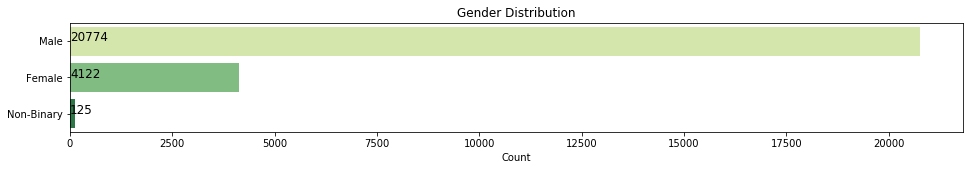

In [13]:
plt.figure(figsize=(16,2))
count =  survey['q3Gender'].value_counts()
print(count)
sns.barplot(count.values,count.index,palette = 'YlGn')
for i,v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=12)
    
plt.title('Gender Distribution')
plt.xlabel('Count')
plt.show()

### Age Band Distribution

18 - 24 years old     12589
25 - 34 years old      8514
35 - 44 years old      2333
12 - 18 years old      1011
45 - 54 years old       468
55 - 64 years old       102
Under 12 years old       13
65 - 74 years old        11
75 years or older         8
Name: q2Age, dtype: int64


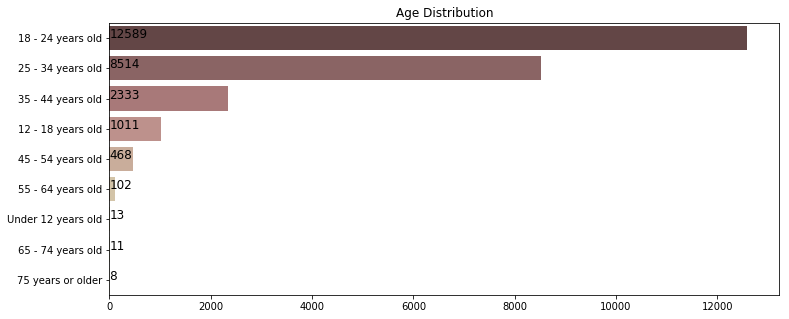

In [14]:
count = survey['q2Age'].value_counts()
print(count)
plt.figure(figsize=(12,5))
sns.barplot(count.values,count.index,palette='pink')
for i,v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=12)
    
plt.title('Age Distribution')
plt.show()


### Age Begin coding

16 - 20 years old     14293
11 - 15 years old      5264
21 - 25 years old      3626
5 - 10 years old        933
26 - 30 years old       642
31 - 35 years old       193
36 - 40 years old        67
41 - 50 years old        34
50+ years or older        8
Name: q1AgeBeginCoding, dtype: int64


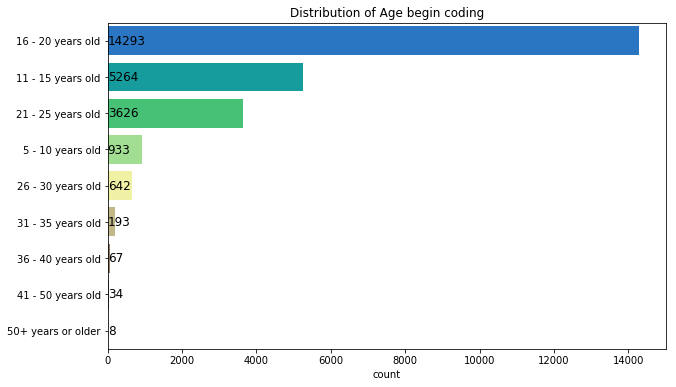

In [15]:
count = survey['q1AgeBeginCoding'].value_counts()
print (count)
plt.figure(figsize=(10,6))
sns.barplot(count.values,count.index,palette='terrain')
for i,v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=12,va='center')

plt.title('Distribution of Age begin coding')
plt.xlabel('count')
plt.show()



### Distribution of Age Begin coding grouped by gender

q3Gender            Female     Male  Non-Binary
q1AgeBeginCoding                               
11 - 15 years old    569.0   4651.0        37.0
16 - 20 years old   2657.0  11543.0        57.0
21 - 25 years old    609.0   2998.0        11.0
26 - 30 years old    130.0    506.0         5.0
31 - 35 years old     48.0    144.0         1.0
36 - 40 years old     19.0     47.0         1.0
41 - 50 years old     12.0     22.0         NaN
5 - 10 years old      71.0    848.0        11.0
50+ years or older     3.0      3.0         2.0


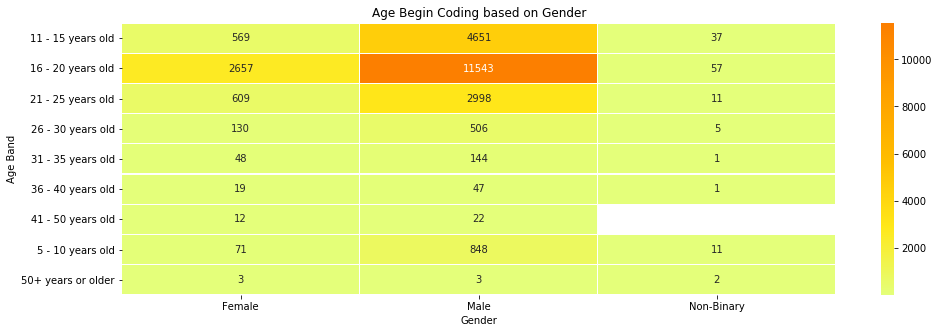

In [16]:
count = survey.groupby(['q1AgeBeginCoding','q3Gender'])['q3Gender'].count().reset_index(name = 'count')
#print(count)
count = count.pivot(columns='q3Gender', index= 'q1AgeBeginCoding',values='count')
print(count)
plt.figure(figsize= (16,5))
sns.heatmap(count,fmt='.0f',cmap='Wistia',linewidths=.01,annot=True)

    
plt.title('Age Begin Coding based on Gender')
plt.xlabel('Gender')
plt.ylabel('Age Band')
plt.show()

### Education qualification

College graduate                          12010
Post graduate degree (Masters, PhD)        6030
Some college                               2499
Some post graduate work (Masters, PhD)     2493
High school graduate                       1289
Some high school                            316
Vocational training (like bootcamp)         148
Name: q4Education, dtype: int64


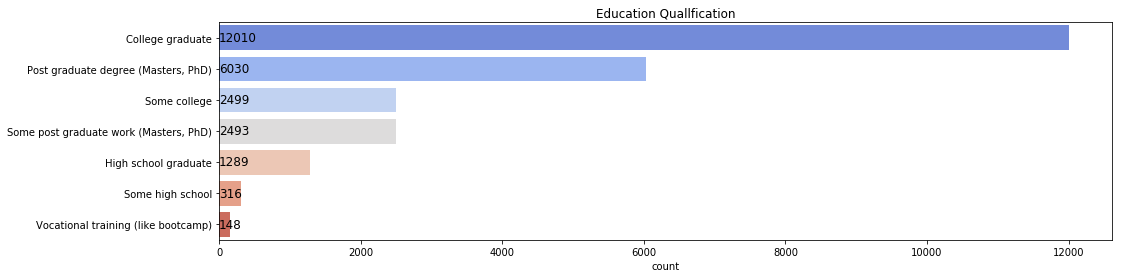

In [17]:
count = survey['q4Education'].value_counts()
print(count)
plt.figure(figsize=(16,4))
sns.barplot(count.values,count.index,palette='coolwarm')
for i,v in enumerate(count):
    plt.text(1,i,v,fontsize=12,va='center')
plt.xlabel('count')
plt.title('Education Quallfication')
plt.show()

In [18]:
from wordcloud import WordCloud, STOPWORDS

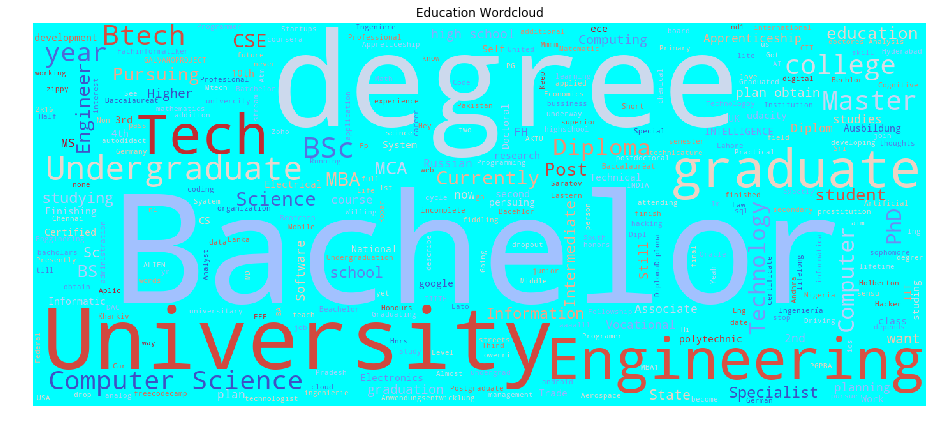

In [19]:
wc = WordCloud(height=600,width=1400,max_words=1000,stopwords=STOPWORDS,colormap='coolwarm',background_color='Cyan').generate(' '.join(survey['q0004_other'].dropna().astype(str)))
plt.figure(figsize = (16,16))
plt.imshow(wc)
plt.title('Education Wordcloud')
plt.axis('off')
plt.show()

### How did you learn to Code?

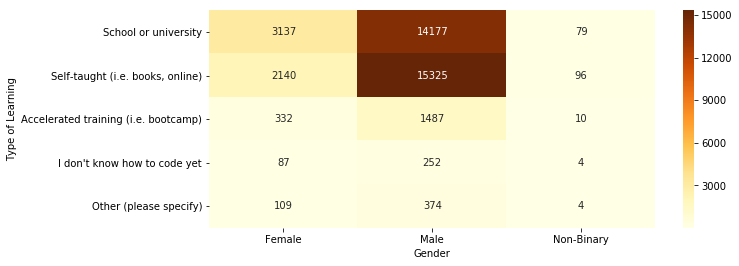

In [20]:
col = survey.columns[survey.columns.str.startswith('q6')]
#print(col)

codeLearn = pd.DataFrame()
for c in col:
    agg = survey.groupby([c,'q3Gender'])['q3Gender'].count().reset_index(name='count')
    agg = agg.pivot(columns='q3Gender',index=c,values='count')
    codeLearn = pd.concat([codeLearn,agg])
    

plt.figure(figsize=(10,4))
sns.heatmap(codeLearn,fmt='.0f',cmap='YlOrBr',annot=True)
plt.xlabel('Gender')
plt.ylabel('Type of Learning')
plt.show()
#codeLearn



### How did you learn to code?

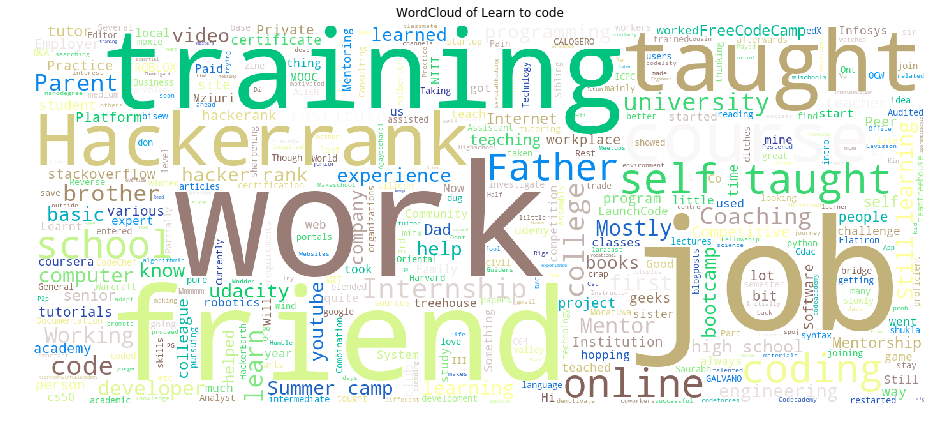

In [21]:
wc = WordCloud(height=600,width=1400,max_words=1000,stopwords=STOPWORDS,colormap='terrain',background_color='white').generate(' '.join(survey['q0006_other'].dropna().astype(str)))
plt.figure(figsize=(16,16))
plt.imshow(wc)
plt.axis('off')
plt.title('WordCloud of Learn to code')
plt.show()

### Current Employment Level

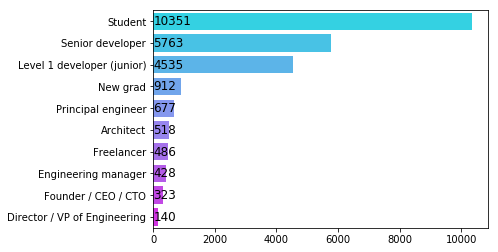

In [22]:
count = survey['q8JobLevel'].value_counts()
sns.barplot(x=count.values,y=count.index,palette='cool')
for i,v in enumerate(count.values):
    plt.text(1,i,v,fontsize=12,va='center')
plt.show()    

### Current Employment level grouped by gender

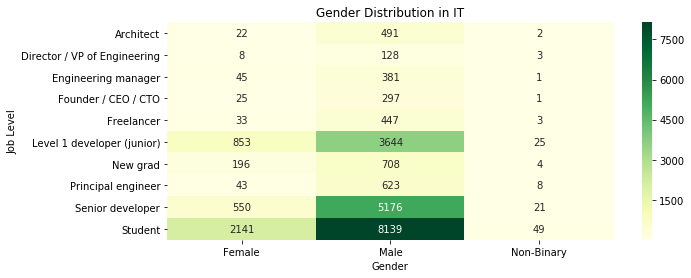

In [23]:
count = survey.groupby(['q8JobLevel','q3Gender'])['q3Gender'].count().reset_index(name='count')
count = count.pivot(columns='q3Gender', index='q8JobLevel',values='count')
#print (count)

plt.figure(figsize=(10,4))
sns.heatmap(count,fmt='.0f',cmap='YlGn',annot=True)
plt.xlabel('Gender')
plt.ylabel('Job Level')
plt.title('Gender Distribution in IT')
plt.show()


### Other Famous Job Titles

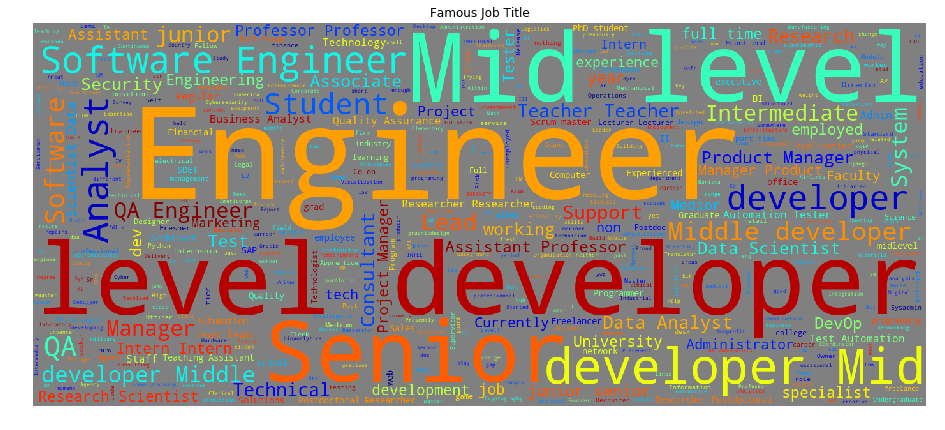

In [24]:
wc = WordCloud(height=600,width=1400,max_words=1000,stopwords=STOPWORDS,colormap='jet',background_color='grey').generate(' '.join(survey['q0008_other'].dropna().astype(str)))
plt.figure(figsize=(16,16))
plt.imshow(wc)
plt.axis('off')
plt.title('Famous Job Title')
plt.show()

### Describe Current role at job?

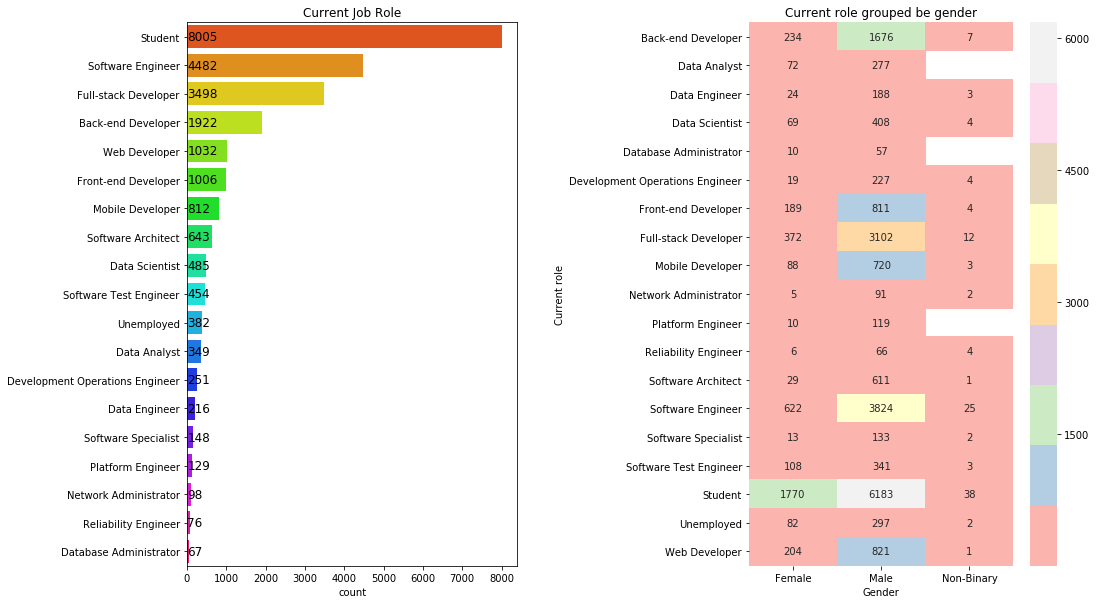

In [25]:
f, ax = plt.subplots(1,2,figsize=(16,10))
rolecount = survey['q9CurrentRole'].value_counts()
sns.barplot(rolecount.values,rolecount.index,palette='hsv',ax=ax[0],)
ax[0].set_title('Current Job Role')
ax[0].set_xlabel('count')
for i,v in enumerate(rolecount.values):
    ax[0].text(10,i,v,fontsize='12',va='center')
    
agg = survey.groupby(['q9CurrentRole','q3Gender'])['q3Gender'].count().reset_index(name='count')
agg = agg.pivot(columns='q3Gender',index='q9CurrentRole',values='count')
sns.heatmap(agg,cmap='Pastel1',annot=True,fmt='.0f',ax=ax[1])
ax[1].set_title('Current role grouped be gender')
ax[1].set_xlabel('Gender')
ax[1].set_ylabel('Current role')
plt.subplots_adjust(wspace=0.7)


### Current industry distribution

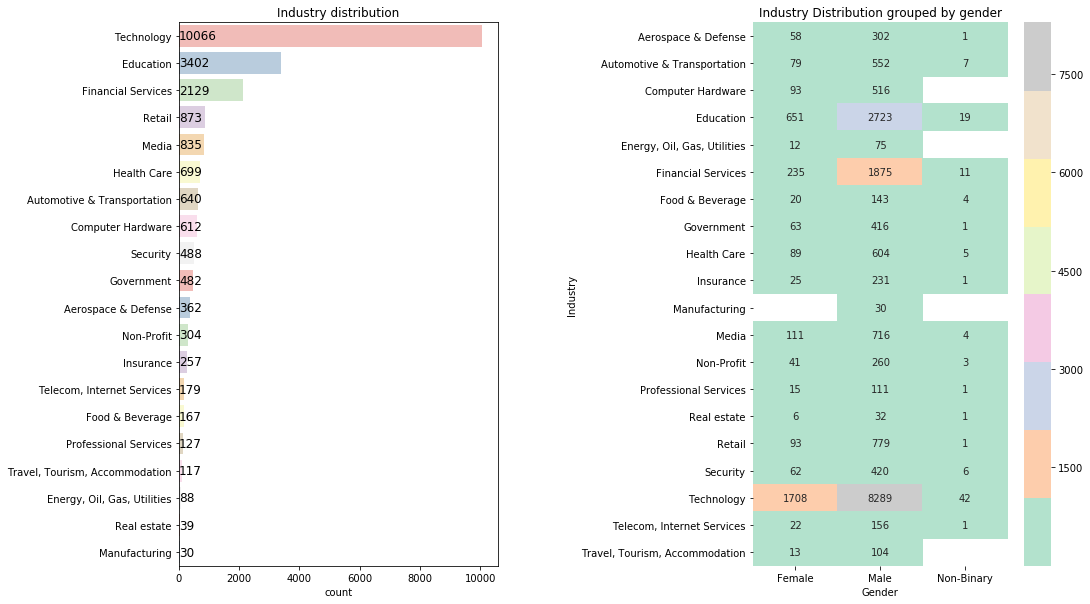

In [26]:
f,ax = plt.subplots(1,2,figsize=(16,10))
industry =  survey['q10Industry'].value_counts()
sns.barplot(industry.values,industry.index,ax=ax[0],palette='Pastel1')
for i,v in enumerate(industry.values):
    ax[0].text(10,i,v,fontsize=12,va='center')
ax[0].set_title('Industry distribution')
ax[0].set_xlabel('count')

agg = survey.groupby(['q10Industry','q3Gender'])['q3Gender'].count().reset_index(name='count')
agg =agg.pivot(columns='q3Gender',index='q10Industry',values='count')
sns.heatmap(agg,cmap='Pastel2',ax=ax[1],fmt='.0f',annot=True)
ax[1].set_title('Industry Distribution grouped by gender')
ax[1].set_xlabel('Gender')
ax[1].set_ylabel('Industry')
plt.subplots_adjust(wspace=0.8)

### Top 3 Important things in a new Job

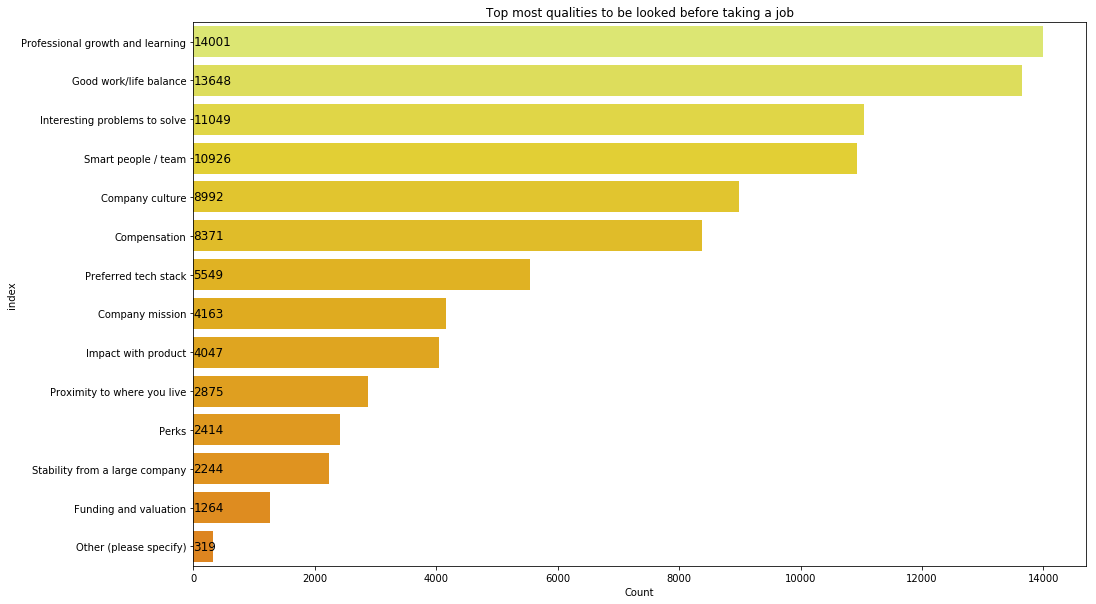

In [27]:
cols =  survey.columns[survey.columns.str.startswith('q12')]
#cols
newJob = pd.DataFrame()

for i in cols:
    inter = survey[i].value_counts().reset_index(name='count')
    newJob=pd.concat([newJob,inter])
    #agg = survey.groupby([i,'q3Gender'])['q3Gender'].count().reset_index(name='count')
    #agg = agg.pivot(columns='q3Gender', index=i,values='count')
    #newJob = pd.concat([newJob,agg])

newJob=newJob.sort_values(by='count',ascending=False)
#newJob

plt.figure(figsize=(16,10))
sns.barplot(newJob['count'],newJob['index'],palette='Wistia')
for i,v in enumerate(newJob['count']):
    plt.text(0.8,i,v,fontsize=12,va='center')
plt.xlabel('Count')
plt.title('Top most qualities to be looked before taking a job')
plt.show()

### How employer measure skills

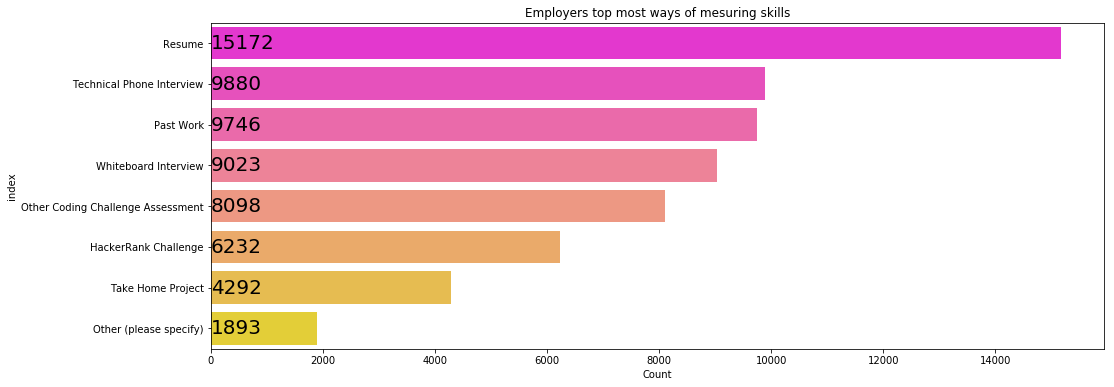

In [28]:
cols = survey.columns[survey.columns.str.startswith('q13')]
#cols
skills = pd.DataFrame()

for i in cols:
    agg = survey[i].value_counts().reset_index(name='count')    
    skills = pd.concat([skills,agg])
    
#print(skills)
skills.sort_values(by='count',ascending=False,inplace=True)

plt.figure(figsize=(16,6))
sns.barplot(skills['count'],skills['index'],palette='spring')

for i,v in enumerate(skills['count']):
    plt.text(1,i,v,fontsize=20,verticalalignment='center')
                     
plt.title('Employers top most ways of mesuring skills')
plt.xlabel('Count')
plt.show()

### Recruiters Challenges

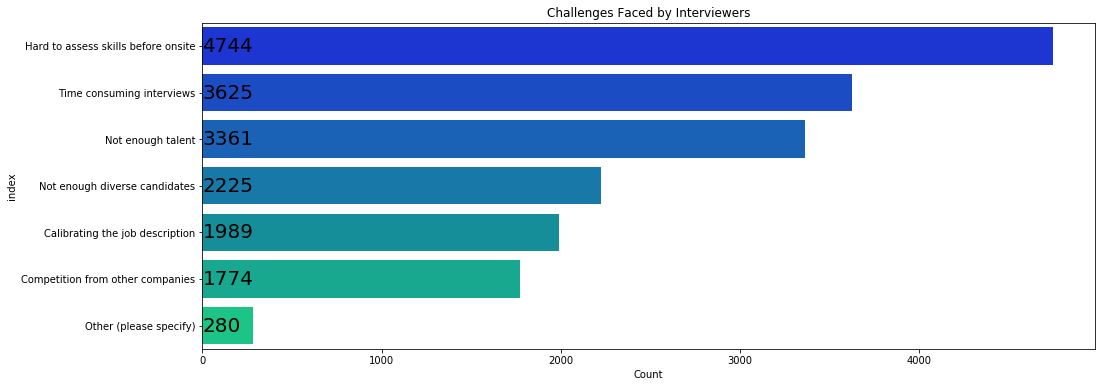

In [29]:
cols = survey.columns[survey.columns.str.startswith('q17')]
#cols
challenges = pd.DataFrame()

for i in cols:
    agg = survey[i].value_counts().reset_index(name='count')
    challenges = pd.concat([challenges,agg])

challenges.sort_values(by='count',ascending=False,inplace=True)

plt.figure(figsize=(16,6))
sns.barplot(challenges['count'],challenges['index'],palette='winter')

for i,v in enumerate(challenges['count']):
    plt.text(1,i,v,fontsize=20,verticalalignment='center')
    
plt.title('Challenges Faced by Interviewers')
plt.xlabel('Count')
plt.show()

### Polpular Assesment Tools for interviewing

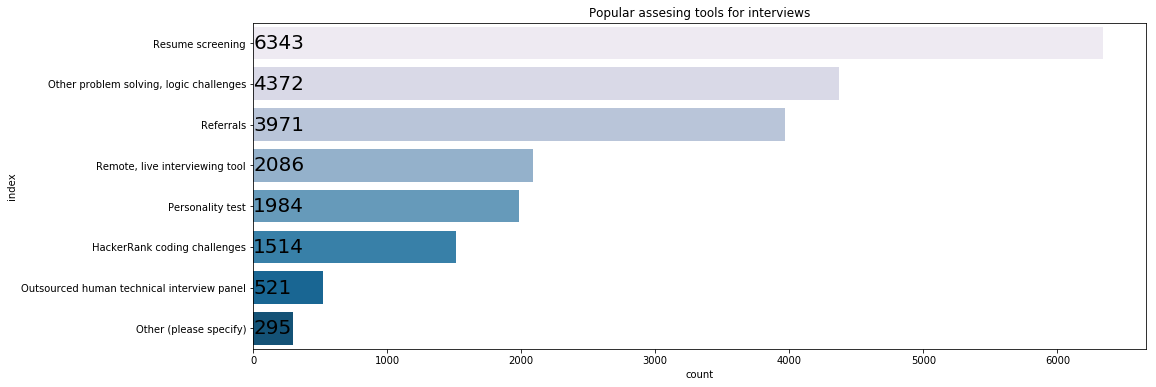

In [30]:
cols =  survey.columns[survey.columns.str.startswith('q19')]
#cols

tools =pd.DataFrame()
for i in cols:
    agg = survey[i].value_counts().reset_index(name='count')
    tools = pd.concat([tools,agg])
    
tools.sort_values(by='count',ascending=False,inplace=True)
plt.figure(figsize=(16,6))
sns.barplot(tools['count'],tools['index'],palette='PuBu')
for i,txt in enumerate(tools['count']):
    plt.text(1,i,txt,fontsize=20,verticalalignment='center')
    
plt.title('Popular assesing tools for interviews')
plt.xlabel('count')
plt.show()

### Qualification required for the onsite

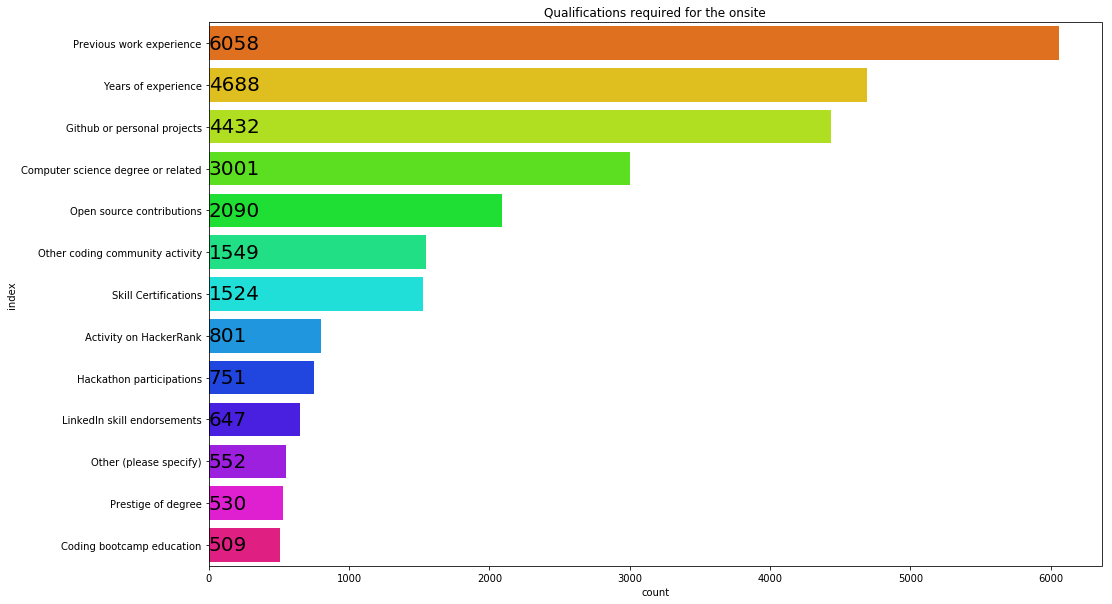

In [31]:

cols = survey.columns[survey.columns.str.startswith('q20')]
#cols

qual = pd.DataFrame()
for i in cols:
    agg = survey[i].value_counts().reset_index(name='count')
    qual=pd.concat([qual,agg])

qual.sort_values(by='count',ascending=False,inplace=True)
qual

plt.figure(figsize=(16,10))
sns.barplot(qual['count'],qual['index'],palette='hsv')
for i,v in enumerate(qual['count']):
    plt.text(0.5,i,v,fontsize=20,verticalalignment='center')
plt.xlabel('count')
plt.title('Qualifications required for the onsite')
plt.show()

### What Recruiters look for in Software developers

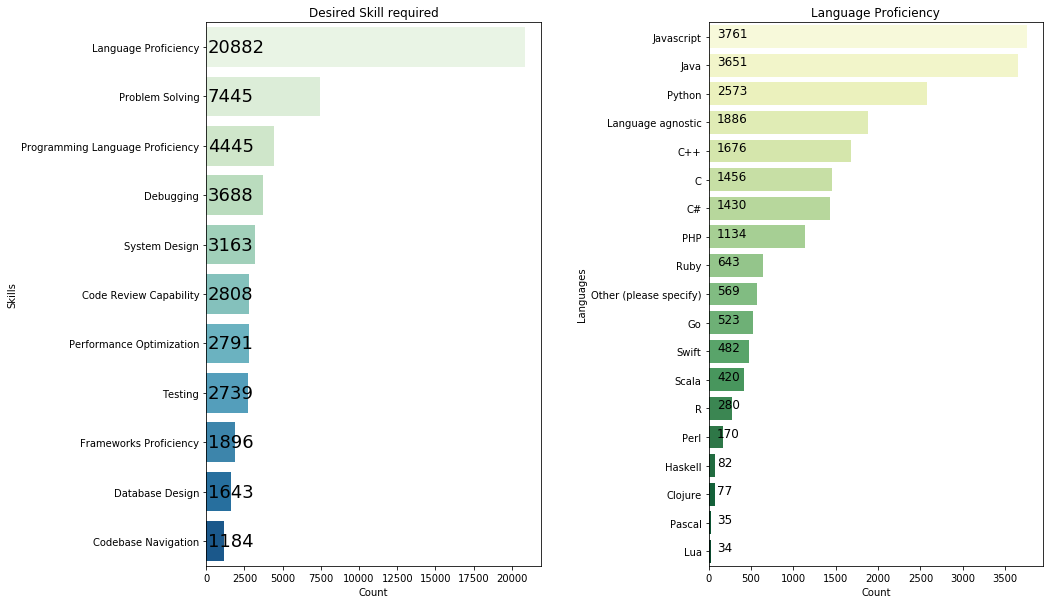

In [32]:
col1 = survey.columns[survey.columns.str.startswith('q21')]
col2 = survey.columns[survey.columns.str.startswith('q22')]
skills = pd.DataFrame()
col1

for i in col1:
    agg = survey[i].value_counts().reset_index(name='count')
    skills = pd.concat([skills,agg],axis=0,ignore_index=True)

lang = pd.DataFrame()
for i in col2:
    agg2 = survey[i].value_counts().reset_index(name='count')
    lang = pd.concat([lang,agg2])
    
lang.sort_values(by='count',ascending=False,inplace=True)

skills.loc[len(skills)]=['Language Proficiency',lang['count'].sum()]
skills.sort_values(by='count',ascending=False,inplace=True)
#skills

f,ax =plt.subplots(1,2,figsize=(15,10))
sns.barplot(skills['count'], skills['index'], palette='GnBu',ax=ax[0])
for i,v in enumerate(skills['count']):
    ax[0].text(100,i,v,fontsize=18,verticalalignment='center')
ax[0].set_xlabel('Count')
ax[0].set_ylabel('Skills')
ax[0].set_title('Desired Skill required')

sns.barplot(lang['count'],lang['index'],palette='YlGn',ax=ax[1])
for i,v in enumerate(lang['count']):
    ax[1].text(100,i,v,fontsize=12)
ax[1].set_xlabel("Count")
ax[1].set_ylabel('Languages')
ax[1].set_title('Language Proficiency')
plt.subplots_adjust(wspace=0.5)
plt.show()

### Recruiters favourite Frameworks?

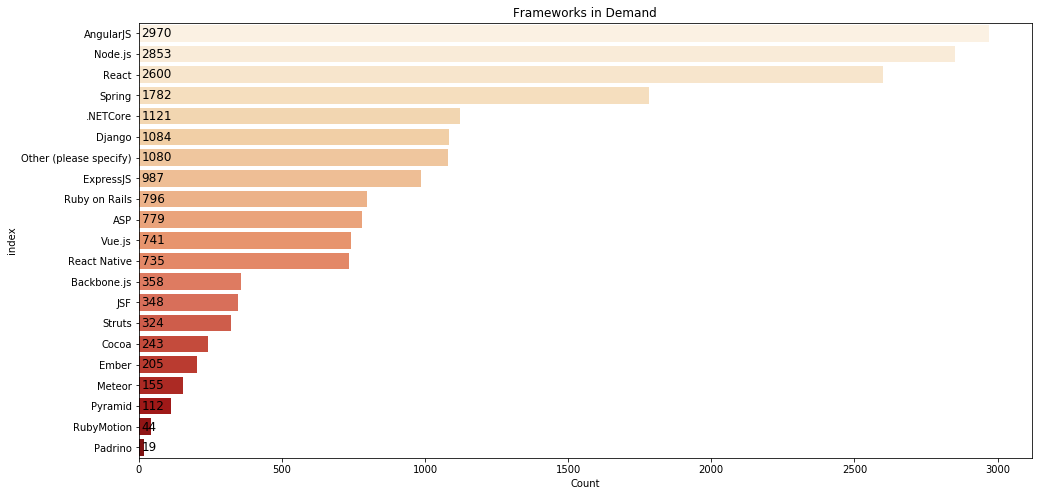

In [33]:
cols =  survey.columns[survey.columns.str.startswith('q23')]
frame=pd.DataFrame()

for i in cols:
    agg = survey[i].value_counts().reset_index(name='count')
    frame=pd.concat([frame,agg],axis=0,ignore_index=True)
#frame
frame.sort_values(by='count',ascending=False,inplace=True)
plt.figure(figsize=(16,8))
sns.barplot(frame['count'],frame['index'],palette='OrRd')
for i,v in enumerate(frame['count']):
    plt.text(10,i,v,fontsize=12,verticalalignment='center')
    
plt.xlabel('Count')
plt.title('Frameworks in Demand')
plt.show()

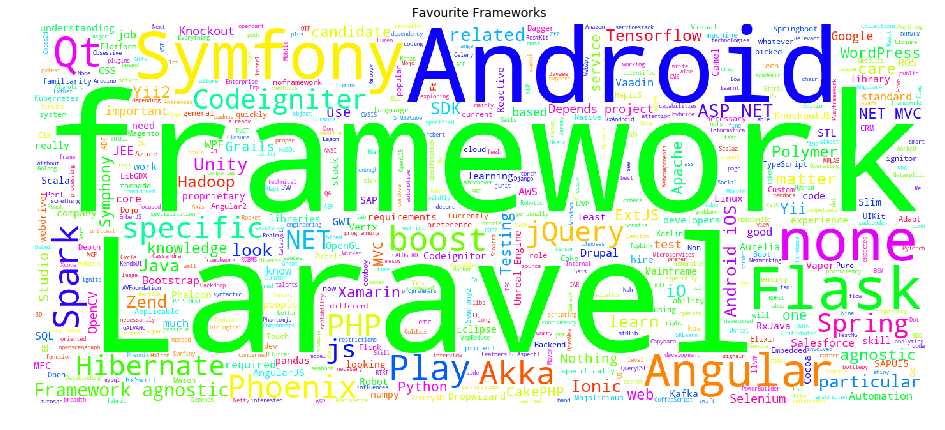

In [34]:
wc=WordCloud(height=600,width=1400,colormap='hsv',stopwords=STOPWORDS,max_words=1000,background_color='white').generate(' '.join(survey['q0023_other'].dropna().astype(str)))
plt.figure(figsize=(16,10))
plt.imshow(wc)
plt.title('Favourite Frameworks')
plt.axis('off')
plt.show()

### Which Languages do developers know and will learn?

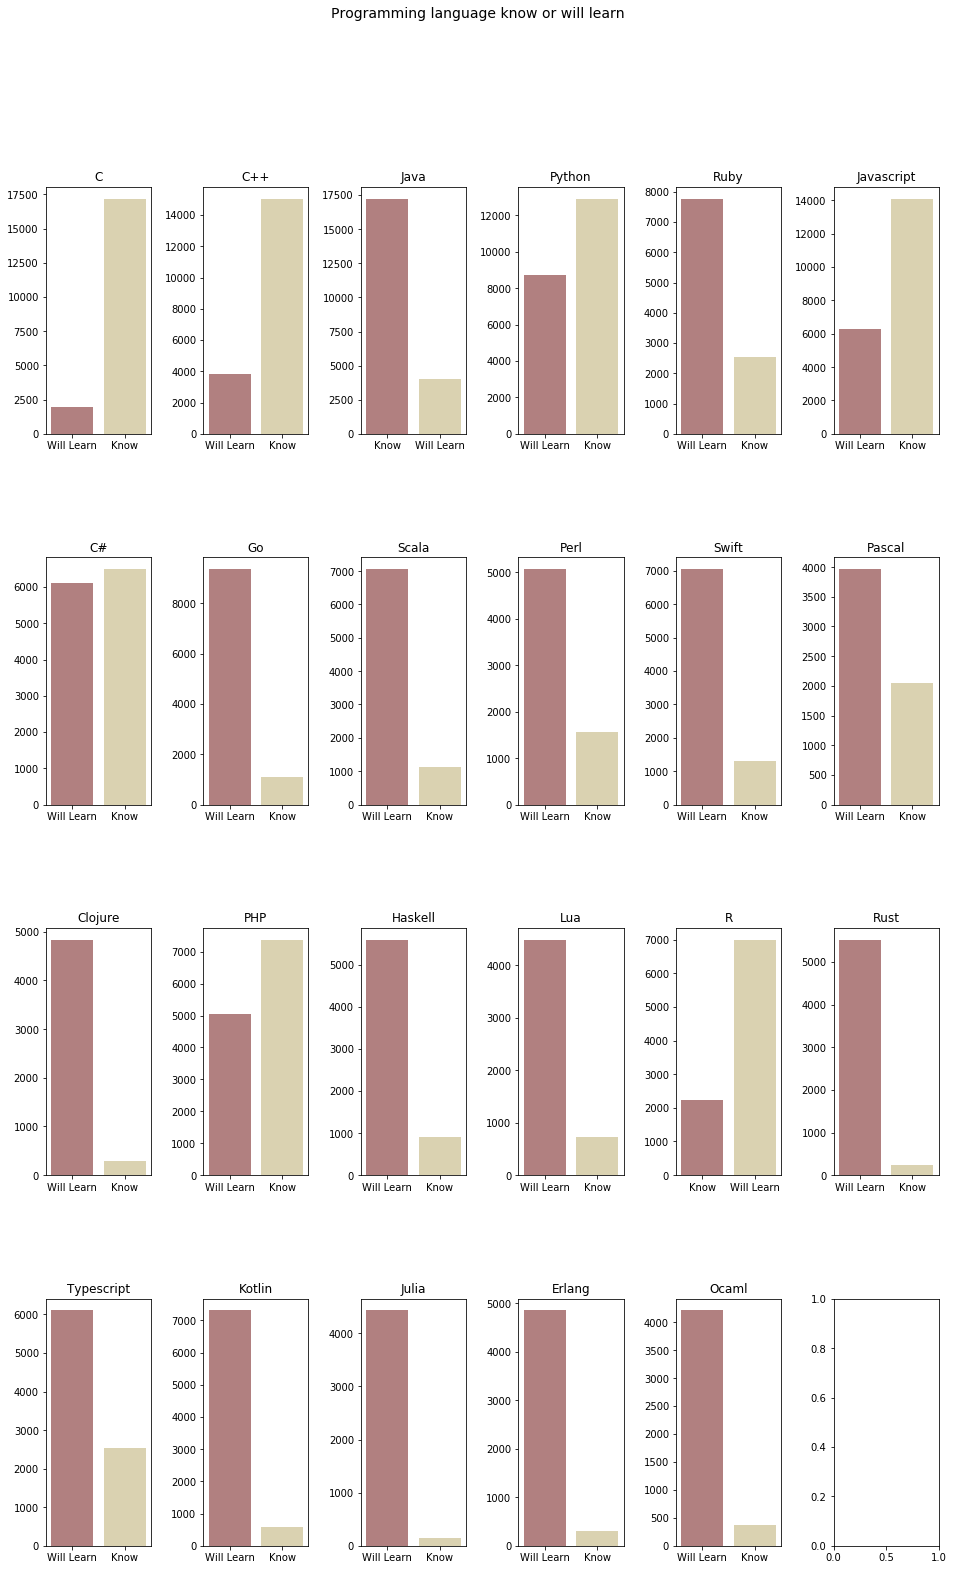

In [35]:
cols= survey.columns[survey.columns.str.startswith('q25')]
cols = cols.drop('q25LangOther')

f,ax = plt.subplots(4,6,figsize=(16,25))
axs=ax.ravel()

for i,c in enumerate(cols):
    sns.countplot(survey[c],ax=axs[i],palette='pink')
    axs[i].set_ylabel('')
    axs[i].set_xlabel('')
    axs[i].set_title(survey_codebook.loc[c]['Survey Question'])

plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.suptitle('Programming language know or will learn',fontsize=14)
plt.show()

### Which Framework do developer know or will learn?

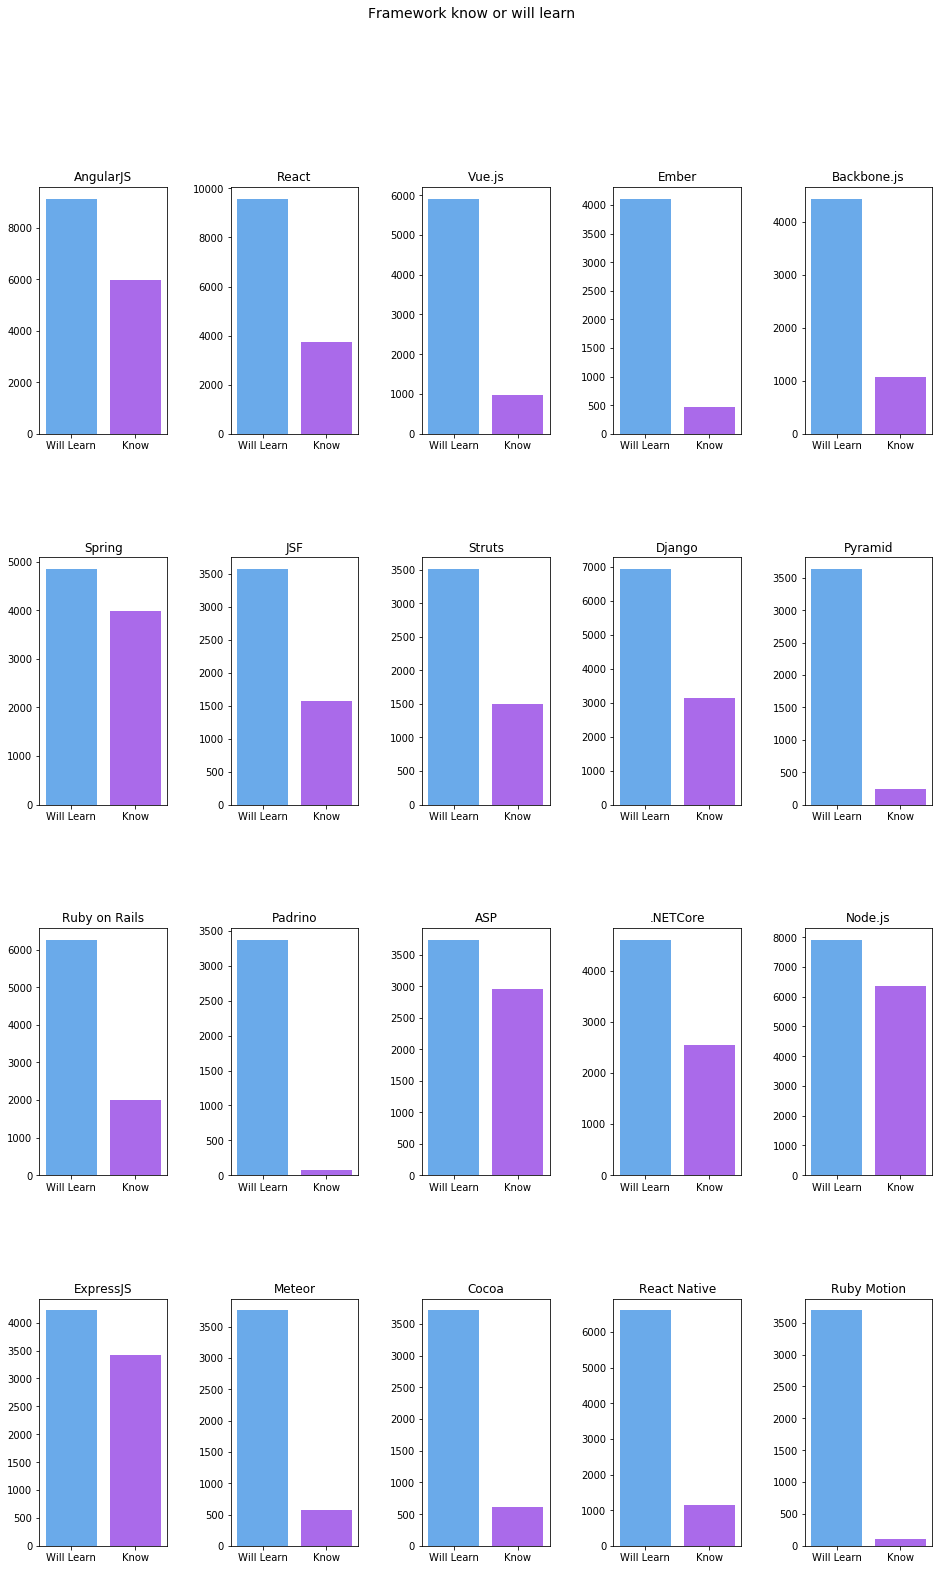

In [36]:
cols = survey.columns[survey.columns.str.startswith('q26')]
#print(len(cols))


f,ax = plt.subplots(4,5,figsize=(16,25))
axs=ax.ravel()

for i,c in enumerate(cols):
    if survey[c].nunique() > 1:
        sns.countplot(survey[c],ax=axs[i],palette='cool')
        axs[i].set_xlabel('')
        axs[i].set_ylabel('')
        axs[i].set_title(survey_codebook.loc[c]['Survey Question'])
    
plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.suptitle('Framework know or will learn',fontsize=14)
plt.show()


### Which emerging tech skill are you currently learning or looking to learn in the next year?

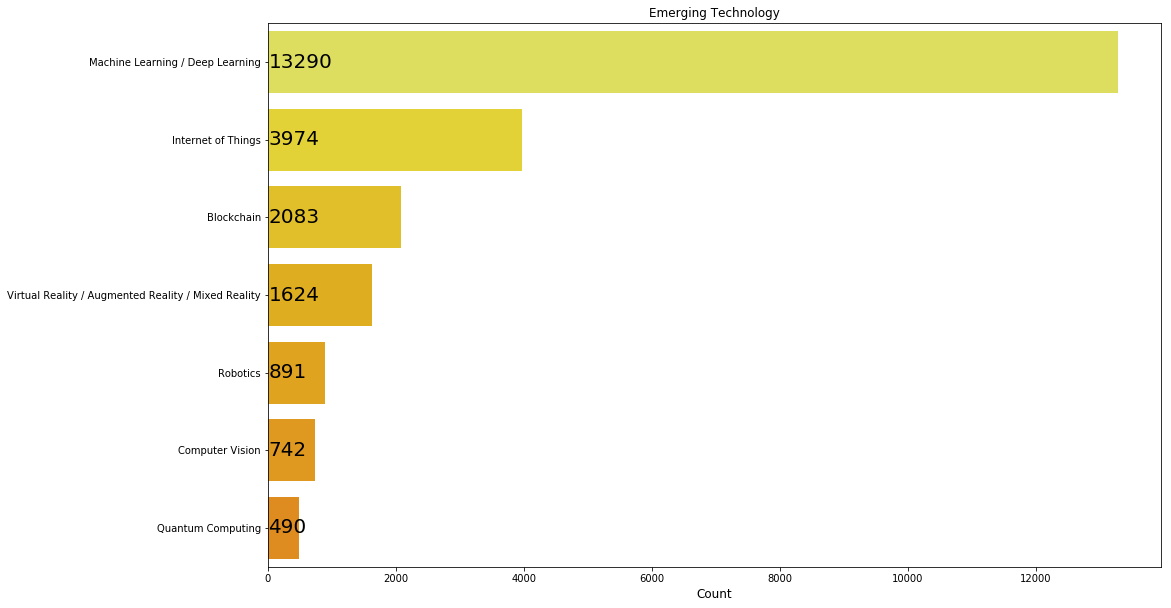

In [37]:
res=survey['q27EmergingTechSkill'].value_counts()

fig = plt.figure(figsize=(16,10))
sns.barplot(x=res.values,y=res.index,palette='Wistia')
for i,v in enumerate(res.values):
    plt.text(10,i,v,fontsize=20,va='center')
plt.xlabel('Count',fontsize=12)
plt.title('Emerging Technology')
plt.show()


### Love or Hate?

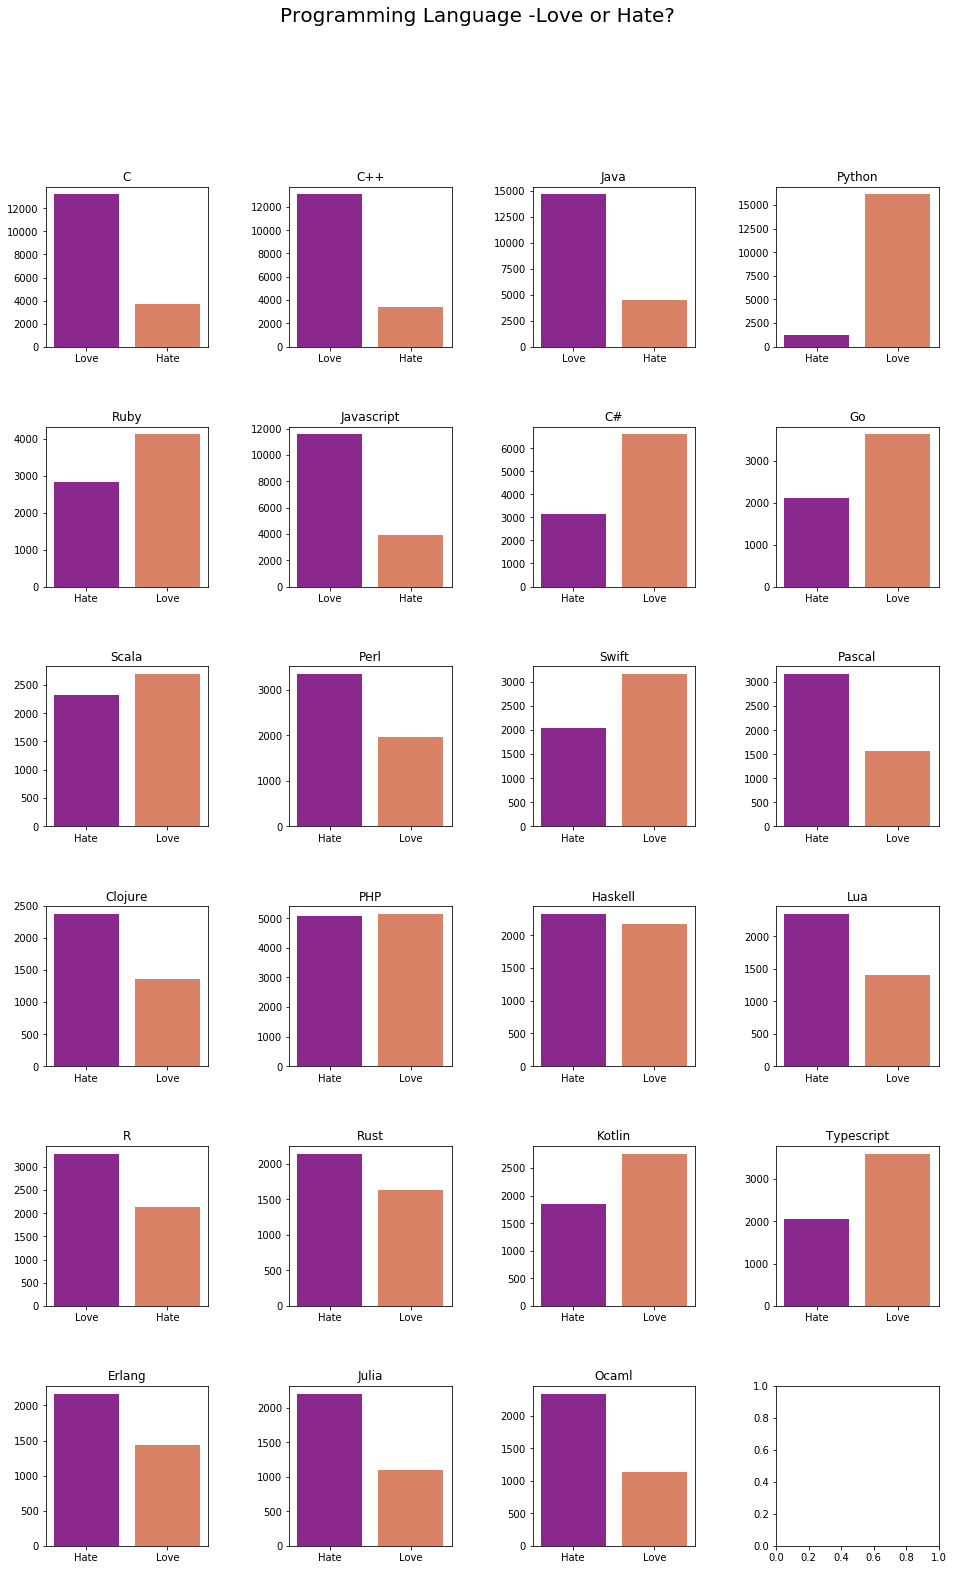

In [38]:
cols = survey.columns[survey.columns.str.startswith('q28')]
#cols
cols = cols.drop('q28LoveOther')

fig, ax = plt.subplots(6,4,figsize=(16,25))
axs=ax.ravel()

for i,c in enumerate(cols):
    sns.countplot(survey[c],palette='plasma',ax=axs[i])
    axs[i].set_xlabel("")
    axs[i].set_ylabel('')
    axs[i].set_title(survey_codebook.loc[c]['Survey Question'])
    
plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.suptitle('Programming Language -Love or Hate?',fontsize=20)
plt.show()


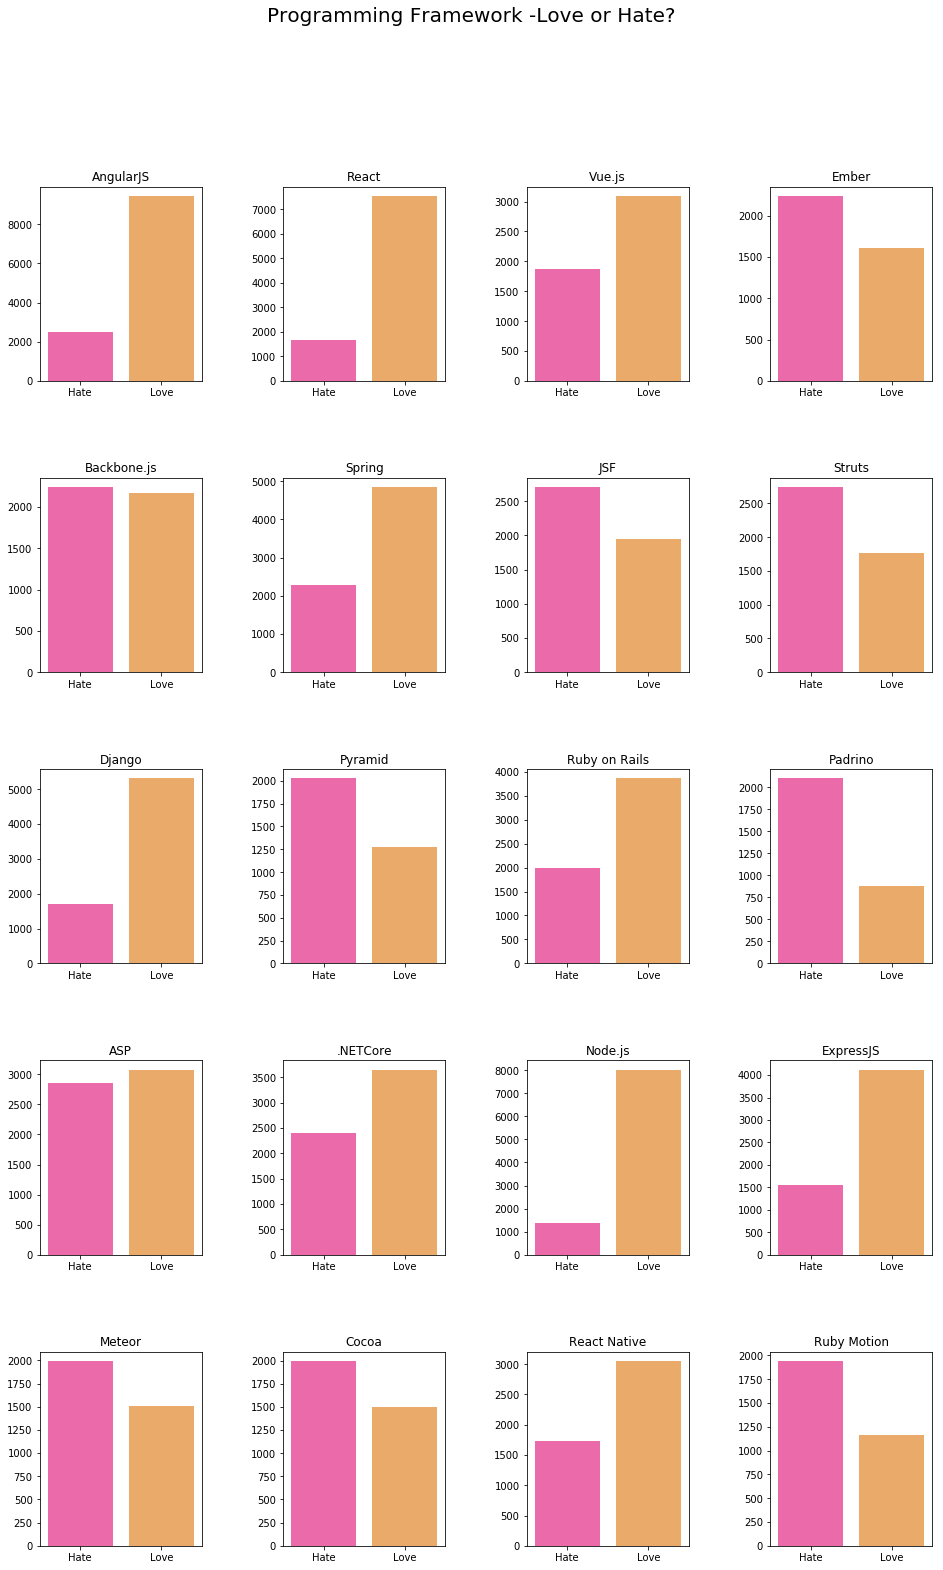

In [39]:
cols = survey.columns[survey.columns.str.startswith('q29')]
#len(cols)

f,ax = plt.subplots(5,4,figsize=(16,25))
axs = ax.ravel()

for i,c in enumerate(cols):
    sns.countplot(survey[c],palette='spring',ax=axs[i])
    axs[i].set_title(survey_codebook.loc[c]['Survey Question'])
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    
plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.suptitle('Programming Framework -Love or Hate?',fontsize=20)
plt.show()

### Source of learning?

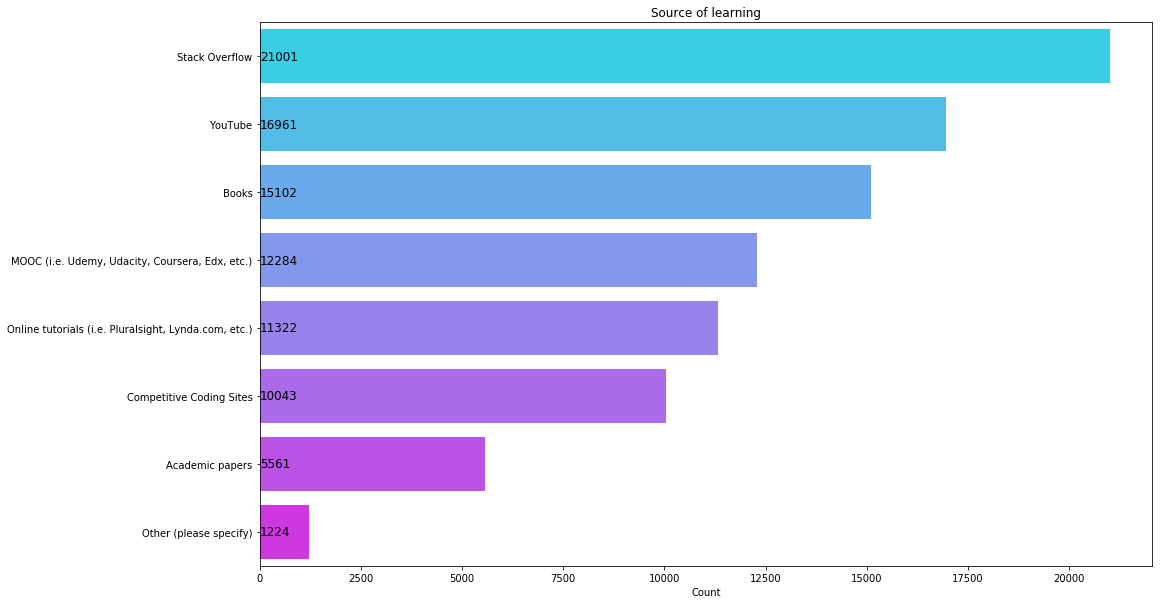

In [40]:
cols = survey.columns[survey.columns.str.startswith('q30')]
learn =pd.DataFrame()

for i in cols:
    agg = survey[i].value_counts().reset_index(name='count')
    learn = pd.concat([learn,agg])

learn.sort_values(by='count',ascending=False,inplace=True)
#print(learn)

plt.figure(figsize=(16,10))
sns.barplot(learn['count'],learn['index'],palette='cool')
for i,v in enumerate(learn['count']):
    plt.text(10,i,v,fontsize=12,va='center')
    
plt.xlabel('Count')
plt.ylabel('')
plt.title('Source of learning')
plt.show()

### Would you recommend Hackerrank to buddies?

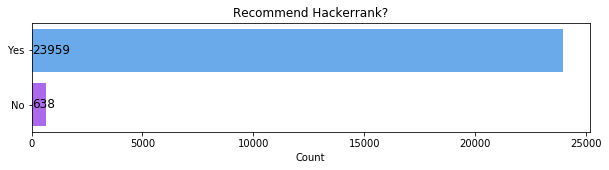

In [41]:
agg = survey['q32RecommendHackerRank'].value_counts().reset_index(name='count')
#print (agg)

plt.figure(figsize=(10,2))
#sns.countplot(survey['q32RecommendHackerRank'],palette='cool')
sns.barplot(agg['count'],agg['index'],palette='cool')
for i,v in enumerate(agg['count']):
    plt.text(10,i,v,fontsize='12',va='center')
plt.xlabel('Count')
plt.ylabel('')
plt.title('Recommend Hackerrank?')
plt.show()

### Rate your experience in Hackerrank?

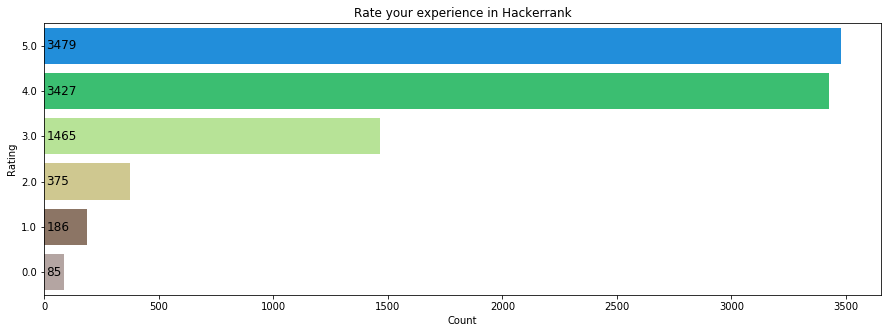

In [42]:
agg = survey['q34PositiveExp'].value_counts().reset_index(name='count')
#agg['index'] = agg['index'].astype(str)
#agg.sort_values(by='count',ascending=False)
#print (agg)
#print(agg.info())

plt.figure(figsize=(15,5))
sns.barplot(agg['count'], agg['index'], palette='terrain', orient='h', order=agg['index'])
for i,v in enumerate(agg['count']):
    plt.text(10,i,v,fontsize=12,va='center')
    
plt.xlabel('Count')
plt.ylabel('Rating')
plt.title('Rate your experience in Hackerrank')
plt.show()